In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
text_path='/content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/1661-0.txt'
file= open(text_path, 'r', encoding='utf8')

#store fule in list
lines=[]
for i in file:
  lines.append(i)

# convert list to string
data=''
for i in lines:
  data= ' '.join(lines)

#replace unnecessary stuff with space
data= data.replace('\n','').replace('\r','').replace('\ufeff','').replace('”','').replace('“','')

#remove unnecessary spaces

data= data.split()
data= ' '.join(data)

In [ ]:
len(data)

573660

#Apply Tokenization

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts([data])

#saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

seq_data= tokenizer.texts_to_sequences([data])[0]
seq_data[:5]

[142, 4680, 1, 986, 5]

In [ ]:
len(seq_data)

108958

In [ ]:
vocab_size= len(tokenizer.word_index) +1
vocab_size

8624

In [ ]:
seq=[]

for i in range(3,len(seq_data)):   #slice the seq to sentences, eachone contain only 4 words
  words= seq_data[i-3:i+1]
  seq.append(words)

print('the len of seq is:', len(seq))
seq= np.array(seq)
seq[:10]

the len of seq is: 108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [ ]:
x= []
y= []
for i in seq:          # make 3 of 4 words dependant and 4th word is independant
  x.append(i[0:3])
  y.append(i[3])

x=np.array(x)
y=np.array(y)


In [ ]:
y= to_categorical(y, num_classes=vocab_size) # convert to binary matrix
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

#Creating the model

In [ ]:
model= Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation='relu'))
model.add(Dense(vocab_size,activation='softmax' ))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21767864 (83.04 MB)
Trainable params: 21767864 (83.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# plot the model

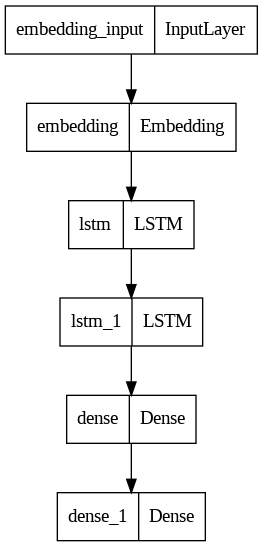

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(model)

#build the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/next_word.h5', monitor='loss', verbose=1, save_best_only=True)
model.compile(loss= 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
model.fit(x,y, epochs=70, batch_size= 64, callbacks=[checkpoint])

Epoch 1/70
1703/1703 [==============================] - ETA: 0s - loss: 6.4127
Epoch 1: loss improved from inf to 6.41269, saving model to /content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/next_word.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1703/1703 [==============================] - 40s 21ms/step - loss: 6.4127
Epoch 2/70
1703/1703 [==============================] - ETA: 0s - loss: 5.8022
Epoch 2: loss improved from 6.41269 to 5.80218, saving model to /content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/next_word.h5
1703/1703 [==============================] - 35s 21ms/step - loss: 5.8022
Epoch 3/70
1703/1703 [==============================] - ETA: 0s - loss: 5.4586
Epoch 3: loss improved from 5.80218 to 5.45859, saving model to /content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/next_word.h5
1703/1703 [==============================] - 37s 22ms/step - loss: 5.4586
Epoch 4/70
1701/1703 [============================>.] - ETA: 0s - loss: 5.1939
Epoch 4: loss improved from 5.45859 to 5.19381, saving model to /content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/next_word.h5
1703/1703 [==============================] - 37s 21ms/step - loss: 5.1938
Epoch 5/

#Prediction

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

#load the model and tokenizer

model= load_model('/content/drive/MyDrive/Colab Notebooks/intern infoTech/next word prediction/next_word.h5')
tokenizer= pickle.load(open('token.pkl', 'rb'))

def predict_next_word(model, tokenizer, text):

  seq= tokenizer.texts_to_sequences([text])
  seq= np.array(seq)
  preds= np.argmax(model.predict(seq))
  predicted_word= ''

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word= key
      break


  print(predicted_word)
  return predicted_word

In [ ]:
while True:
  txt= input('enter your line:')
  if txt== '0':
    print('done..')
    break
  else:
    try:
      txt= txt.split(' ')
      txt= txt[-3:]
      print(txt)

      predict_next_word(model, tokenizer, txt)
    except Exception as e:
      print('error :',e)
      continue

enter your line:going to the
['going', 'to', 'the']
1/1 [==============================] - 0s 19ms/step
hall
enter your line:0
done..


Error: unknown command "unminimize" for "git-lfs"
Run 'git-lfs --help' for usage.


In [143]:
!git push -u origin master

Uploading LFS objects: 100% (1/1), 261 MB | 0 B/s, done.
Enumerating objects: 21, done.
Counting objects: 100% (21/21), done.
Delta compression using up to 2 threads
Compressing objects: 100% (15/15), done.
Writing objects: 100% (21/21), 222.04 MiB | 65.79 MiB/s, done.
Total 21 (delta 7), reused 17 (delta 5), pack-reused 0
remote: Resolving deltas: 100% (7/7), done.
remote: error: Trace: f193a43fc8ec278e6f2a6273a68452d8d9acbec70bbce98464a60fd3552d5f01
remote: error: See https://gh.io/lfs for more information.
remote: error: File next_word.h5 is 249.17 MB; this exceeds GitHub's file size limit of 100.00 MB
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/EslaamAhmed/Next-word-prediction.git
 ! [remote rejected] master -> master (pre-receive hook declined)
error: failed to push some refs to 'https://github.com/EslaamAhmed/Next-word-prediction.git'


In [123]:
!git reset next_word.h5

Unstaged changes after reset:
M	next word prediction.ipynb
